In this notebook, we compare the time-domain and frequency domain $S_{11}$ of the CTP feeds as a function of rigging height. 

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import gainData as gd
import os
import cosmology as cosmo

0.048252


First we load in the simulated gains in the time-domain.

In [14]:
gains_short=[]
root_dir_short=('/Users/aaronew/Dropbox_MIT/Science'
              '/simulations-hera-eox/data/timetraces'
              '/time_trace_ctp_vary_rigging_short/')
file_list_short=[root_dir_short+'time_trace_run00000%d.txt'%m for m in range(1,6)]
for filename in file_list_short:
        gains_short.append(gd.GainData(filename,'CST_TimeTrace',fMin=0.05,fMax=.12))
        
gains_tall=[]
root_dir_tall=('/Users/aaronew/Dropbox_MIT/Science'
              '/simulations-hera-eox/data/timetraces'
              '/time_trace_ctp_vary_rigging_tall/')
file_list_tall=[root_dir_tall+'run00000%d_timetrace.txt'%m for m in range(1,5)]
for filename in file_list_tall:
        gains_tall.append(gd.GainData(filename,'CST_TimeTrace',fMin=0.05,fMax=.12))

In [15]:
heights=np.array(154.328+np.array([m*(231.492-154.328)/4 for m in range(5)]))/12.*.3048

Here we plot the delay-response of the short CTP feed as a function of feed height

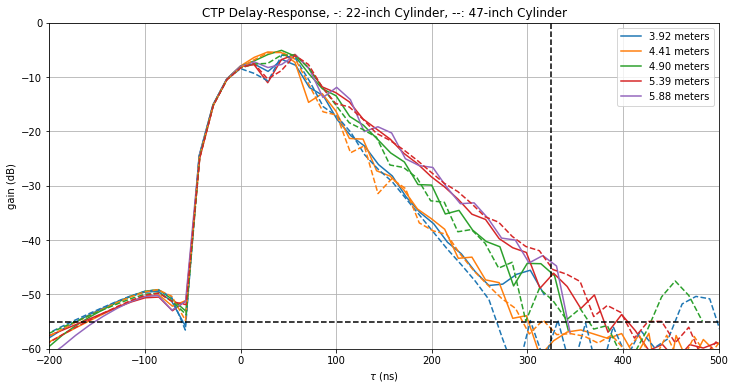

In [24]:
lines_short=[]
for gain,height in zip(gains_short,heights):
    lines_short.append(plt.plot(gain.tAxis,10.*np.log10(np.abs(gain.gainDelay)),
                                label='%.2f meters'%height))

lindex=0
for gain,height in zip(gains_tall,heights[:-1]):
    plt.plot(gain.tAxis,10*np.log10(np.abs(gain.gainDelay)),
            color=lines_short[lindex][0].get_color(),
            ls='--')
    lindex+=1
plt.xlim(-200,500)
plt.ylim(-60,0)
plt.legend()
plt.axvline(325,color='k',ls='--')
plt.axhline(-55,color='k',ls='--')
plt.grid()
plt.xlabel('$\\tau$ (ns)')
plt.ylabel('gain (dB)')
plt.gcf().set_size_inches(12,6)
plt.title('CTP Delay-Response, -: 22-inch Cylinder, --: 47-inch Cylinder')